# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Matemática Para Machine Learning</font>

## Exercícios - Otimização

Quando você se aventura em Machine Learning, um dos aspectos fundamentais do seu aprendizado é entender o processo de otimização pela descida do gradiente. A descida de gradiente é a espinha dorsal de um algoritmo de aprendizado de máquina moderno. 

Uma vez que você compreenda a descida do gradiente, as coisas começam a ficar mais claras e é fácil entender algoritmos diferentes. 

Vamos começar com alguns dados. Vamos criar um conjunto de dados linear com algum ruído gaussiano aleatório.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Estilo para os gráficos
plt.style.use(['ggplot'])

In [3]:
# Dados aleatórios com relação linear e ruído
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)  # 4 e 3 representam theta0 e theta1, parâmetros do modelo

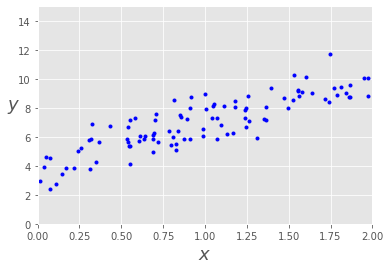

In [4]:
# Plot dos dados
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ = plt.axis([0,2,0,15])

É evidente que Y tem um bom relacionamento linear com X. Esses dados são muito simples e possuem apenas uma variável independente X.

Um algoritmo de regressão linear simples pode ser representado pela fórmula:

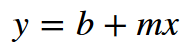

In [5]:
from IPython.display import Image
Image("images/form1.png")

E então você pode resolver a equação para b e m da seguinte maneira:

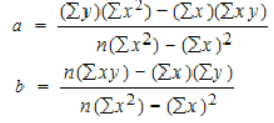

In [6]:
from IPython.display import Image
Image("images/form2.png")

Isso é chamado de método analítico de resolver a equação. Nada de errado nisso, no entanto, lembre-se de que o aprendizado de máquina automatiza esta tarefa. 

Em Machine Learning, posso expressar a equação de uma linha de uma maneira diferente. Eu chamaria y como minha hipótese e a representaria como J (theta) e chamaria b como theta0 e m como theta1. Eu posso escrever a mesma equação como:

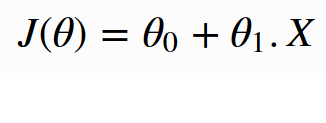

In [7]:
from IPython.display import Image
Image("images/form3.png")

### Exercício 1 - Como você resolveria o problema acima de forma analítica (sem usar Machine Learning)?

In [13]:
# Solução
a = (sum(X+y)-((sum(X)*sum(y))/len(X)))/(sum(X**2)-((sum(X)**2)/len(X)))
b = (sum(y)/len(y))-a*(sum(X)/len(y))

In [14]:
a

array([4.13447119])

In [15]:
b

array([2.93884931])

### Exercício 2 - Usando os parâmetros encontrados no item 1, faça previsões com os novos valores de x apresentados abaixo.

In [16]:
# Solução
y_hat = b + a * X

### Exercício 3 - Crie o gráfico que representa os dados de x e y no item anterior e a linha de regressão.

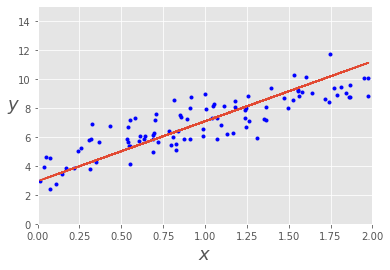

In [18]:
# Solução
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.plot(X,y_hat, label='linear')
_ = plt.axis([0,2,0,15])

## Gradient Descent

A equação para calcular função de custo e gradientes será mostrada abaixo. Note que a função de custo é para regressão linear. Para outros algoritmos, a função de custo será diferente e os gradientes teriam que ser derivados das funções de custo.

m = número de observações

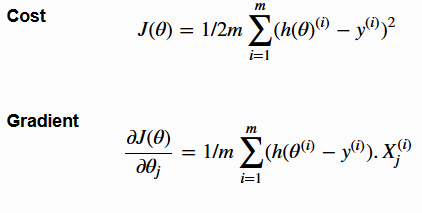

In [19]:
from IPython.display import Image
Image("images/form4.png")

Estamos usando um exemplo de regressão linear. Você começa com um vetor Theta aleatório e prediz o h(Theta), então deduz o custo usando a equação acima que significa Erro Quadrático Médio (MSE). Na sequência, minimizamos o custo para calcular o próximo passo (ou Theta). A derivada parcial é algo que pode ajudar a encontrar Theta para a próxima iteração.

Mas espere atualmente precisamos calcular Theta0 e Theta1. Como fazer isso se tivéssemos vários recursos (variáveis de entrada), pois teríamos vários "Theta"? Não se preocupe, aqui está a forma geral para calcular Theta:

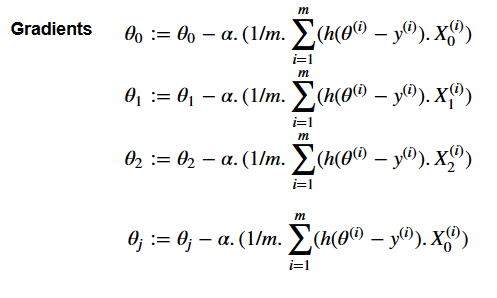

In [20]:
from IPython.display import Image
Image("images/form5.png")

Você está pronto para escrever seu primeiro algoritmo de descida do gradiente. Embora possa parecer esmagador no início, não é tão complexo quanto parece.

Do que precisamos? De uma função de custo e de uma função para a descida do gradiente. Está pronto?

### Exercício 4 - Desenvolva uma função em Python para a função de custo.

In [75]:
def  cal_cost(theta, X, y):
    return (1/2*float(len(y))) * np.sum(np.power(X.dot(theta) - y, 2))

### Exercício 5 - Desenvolva uma função em Python para a otimização com a descida do gradiente.

In [113]:
def gradient_descent(X, y, theta, learning_rate = 0.01, iterations = 100):
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    
    for i in range(0,iterations):
        y_hat = np.dot(X, theta)
        theta = theta - (1/float(len(y))) * learning_rate * (X.T.dot((y_hat - y)))
        
        theta_history[i,:] = theta.T
        cost_history[i]  = cal_cost(theta, X, y)

    return theta, cost_history, theta_history

## Treinamento

In [114]:
# Taxa de aprendiado
lr = 0.01

# Número de iterações de treinamento
n_iter = 1000

# Inicializamos os parâmetros com valores aletórios
theta = np.random.randn(2,1)

# Valores de entrada X e bias
X_b = np.c_[np.ones((len(X),1)),X]

# Treinamento
theta, cost_history, theta_history = gradient_descent(X_b, y, theta, lr, n_iter)


print('Theta0:          {:0.3f}, \nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Custo Final/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.621, 
Theta1:          3.379
Custo Final/MSE:  4705.552


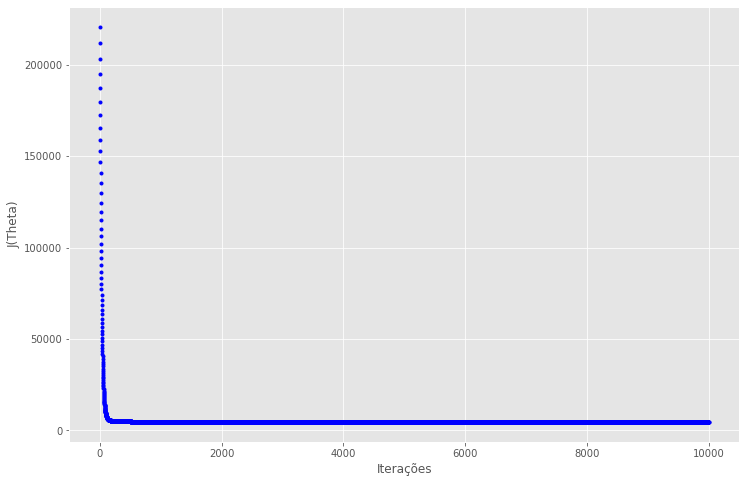

In [109]:
# Gráfico com as iterações e os parâmetros aprendidos no treinamento
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterações')
_=ax.plot(range(n_iter),cost_history,'b.')

In [110]:
# Função para o plot do treinamento com diferentes taxas de aprendizado
def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = número de iterações
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr = 0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr + 0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')

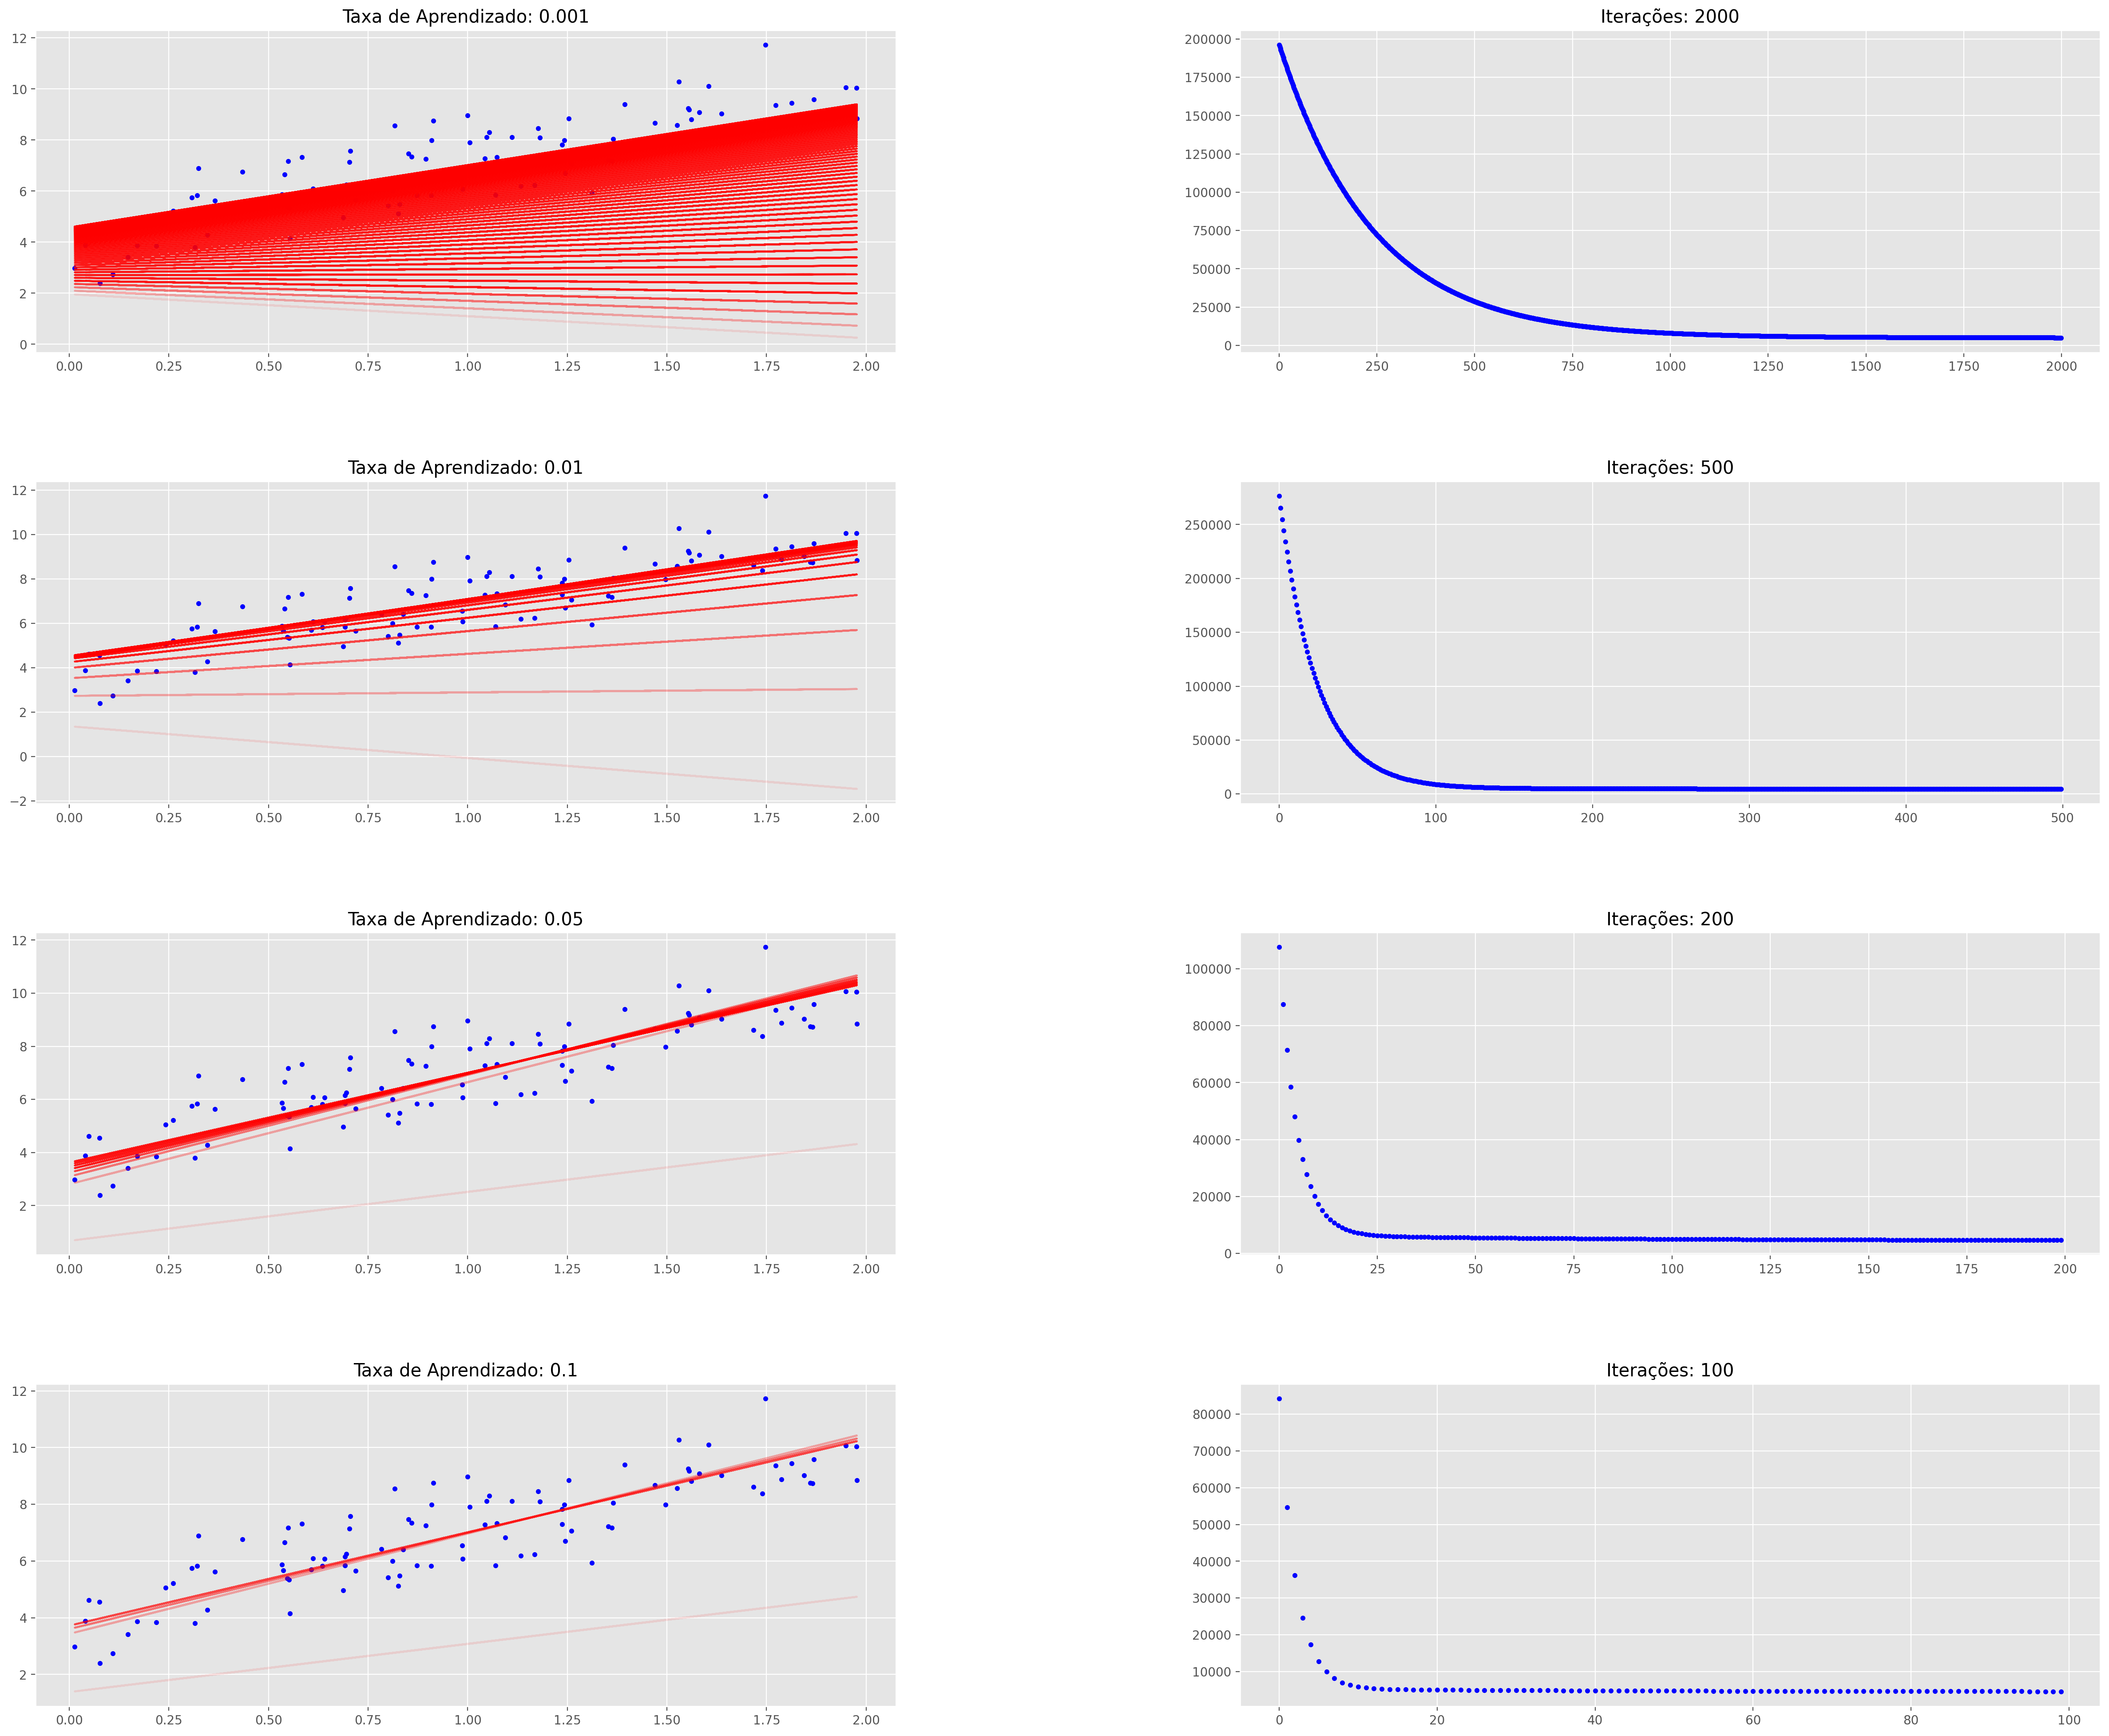

In [86]:
# Plot do treinamento - comparando diferentes taxas de aprendizado
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr = [(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count = 0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("Taxa de Aprendizado: {}".format(lr))
    ax1.set_title("Iterações: {}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)

Verifique como, com pequenas taxas de aprendizado, leva muito tempo para convergir para a solução, enquanto que, com as taxas de aprendizado maiores, é mais rápido.

Uma nota de cautela é que a taxa real de aprendizado do seu problema dependeria dos dados e não há uma fórmula geral para defini-la corretamente. No entanto, existem algoritmos de optimização sofisticados que começam com maiores taxas de aprendizagem e depois reduzem lentamente a taxa de aprendizagem à medida que nos aproximamos da solução, como por exemplo o Otimizador Adam.

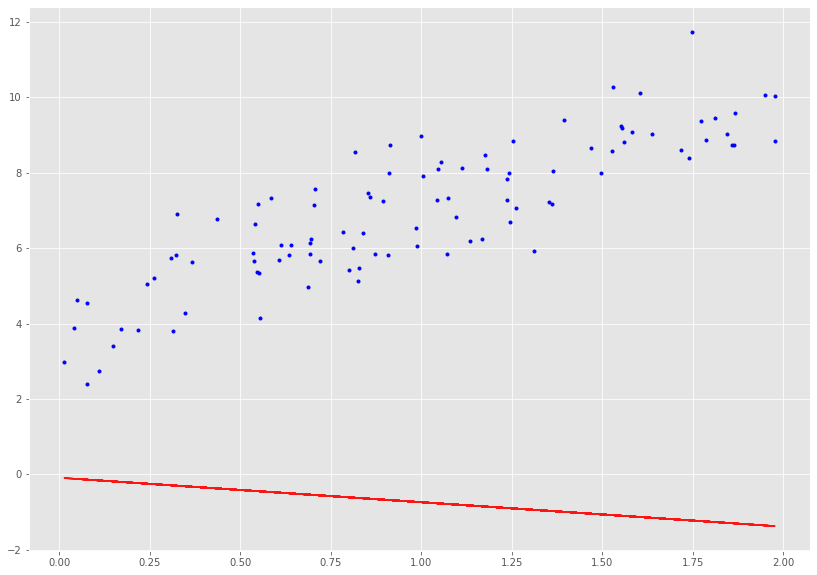

In [81]:
# Linhas de regressão (uma para cada modelo)
_,ax = plt.subplots(figsize=(14,10))
plot_GD(100,0.1,ax)

## Stochastic Gradient Descent

Em nosso algoritmo de gradiente descendente fizemos os gradientes em cada observação um por um. Mas com gradiente descendente estocástico podemos escolher aleatoriamente as observações. É chamado de estocástico porque as amostras são selecionadas aleatoriamente (ou embaralhadas) em vez de usar um único grupo (como na descida de gradiente padrão) ou na ordem em que aparecem no conjunto de treinamento.

### Exercício 6 - Desenvolva uma função em Python para a otimização com a descida estocástica do gradiente.

In [89]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X     = Matrix de x com unidades bias
    y     = Vetor de Y
    theta = Vetor de thetas np.random.randn(j,1)
    learning_rate 
    iterations = número de iterações
    
    Retorna o vetor theta final e a matriz do histórico de custo sobre o número das iterações
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta - (1/m) * learning_rate * ( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [90]:
# Treinamento
lr = 0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Custo Final/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.013,
Theta1:          3.097
Custo Final/MSE:  48.338


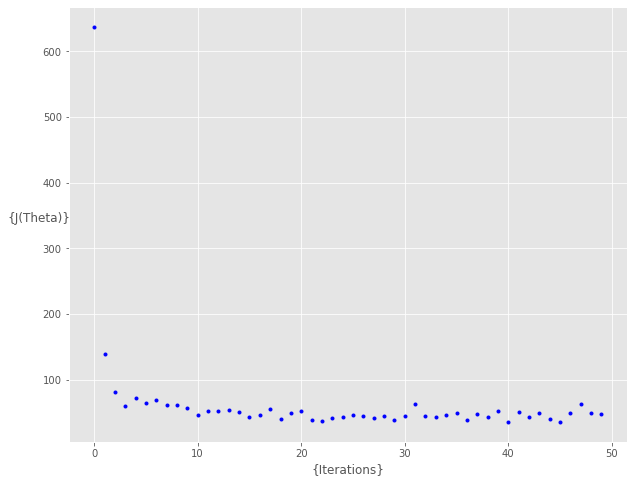

In [91]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

## Mini Batch Gradient Descent

Na prática, usamos uma abordagem chamada descida do gradiente em mini-lote. Essa abordagem usa amostras aleatórias, mas em lotes. O que isso significa é que não calculamos os gradientes para cada observação, mas para um grupo de observações que resulta em uma otimização mais rápida. Uma maneira simples de implementar é embaralhar as observações e, em seguida, criar lotes e prosseguir com a descida de gradiente usando lotes.

### Exercício 7 - Desenvolva uma função em Python para a otimização com a descida do gradiente em mini-lote.

In [105]:
def minibatch_gradient_descent(X, y, theta, learning_rate = 0.01, iterations = 10, batch_size = 20):
    '''
    X     = Matrix de x com unidades bias
    y     = Vetor de Y
    theta = Vetor de thetas np.random.randn(j,1)
    learning_rate 
    iterations = número de iterações
    
    Retorna o vetor theta final e a matriz do histórico de custo sobre o número das iterações
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta - (1/m) * learning_rate * ( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [106]:
# Treinamento
lr = 0.1
n_iter = 200

theta = np.random.randn(2,1)

theta,cost_history = minibatch_gradient_descent(X, y, theta, lr, n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Custo Final/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.998,
Theta1:          3.042
Custo Final/MSE:  903.216


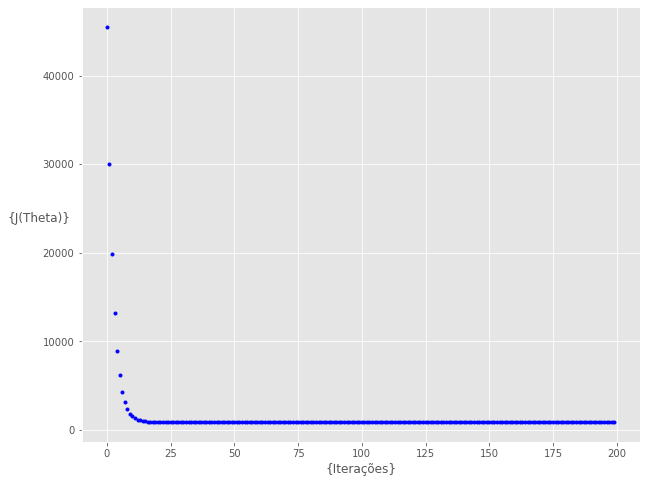

In [107]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterações}')
theta = np.random.randn(2,1)

_ = ax.plot(range(n_iter),cost_history,'b.')

# Fim